In [297]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

from sklearn.model_selection import GridSearchCV


import warnings
warnings.filterwarnings('ignore')

In [298]:
df = pd.read_csv("algerian.csv")
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [299]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   day          246 non-null    str  
 1   month        245 non-null    str  
 2   year         245 non-null    str  
 3   Temperature  245 non-null    str  
 4    RH          245 non-null    str  
 5    Ws          245 non-null    str  
 6   Rain         245 non-null    str  
 7   FFMC         245 non-null    str  
 8   DMC          245 non-null    str  
 9   DC           245 non-null    str  
 10  ISI          245 non-null    str  
 11  BUI          245 non-null    str  
 12  FWI          245 non-null    str  
 13  Classes      244 non-null    str  
dtypes: str(14)
memory usage: 27.1 KB


In [300]:
df[df.isnull().any(axis =1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [301]:
df.loc[:122,"Region"]= 0
df.loc[123:168,"Region"] = 1

In [302]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          246 non-null    str    
 1   month        245 non-null    str    
 2   year         245 non-null    str    
 3   Temperature  245 non-null    str    
 4    RH          245 non-null    str    
 5    Ws          245 non-null    str    
 6   Rain         245 non-null    str    
 7   FFMC         245 non-null    str    
 8   DMC          245 non-null    str    
 9   DC           245 non-null    str    
 10  ISI          245 non-null    str    
 11  BUI          245 non-null    str    
 12  FWI          245 non-null    str    
 13  Classes      244 non-null    str    
 14  Region       169 non-null    float64
dtypes: float64(1), str(14)
memory usage: 29.1 KB


In [303]:
df[['Region']] = df[['Region']].astype('Int64')

In [304]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   day          246 non-null    str  
 1   month        245 non-null    str  
 2   year         245 non-null    str  
 3   Temperature  245 non-null    str  
 4    RH          245 non-null    str  
 5    Ws          245 non-null    str  
 6   Rain         245 non-null    str  
 7   FFMC         245 non-null    str  
 8   DMC          245 non-null    str  
 9   DC           245 non-null    str  
 10  ISI          245 non-null    str  
 11  BUI          245 non-null    str  
 12  FWI          245 non-null    str  
 13  Classes      244 non-null    str  
 14  Region       169 non-null    Int64
dtypes: Int64(1), str(14)
memory usage: 29.3 KB


In [305]:
df[df.isnull().any(axis =1)]


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
168,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN,1
169,15,7,2012,34,45,17,0,90.5,18,24.1,10.9,17.7,14.1,fire,<NA>
170,16,7,2012,31,83,17,0,84.5,19.4,33.1,4.7,19.2,7.3,fire,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,26,9,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,<NA>
243,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,<NA>
244,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,<NA>
245,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,<NA>


In [306]:
df = df.dropna().reset_index(drop = True)
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [307]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1


In [308]:
df = df.drop(122).reset_index(drop = True)

In [309]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1


In [310]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='str')

In [311]:
df.columns = df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='str')

In [312]:

df.info()

<class 'pandas.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   day          165 non-null    str  
 1   month        165 non-null    str  
 2   year         165 non-null    str  
 3   Temperature  165 non-null    str  
 4   RH           165 non-null    str  
 5   Ws           165 non-null    str  
 6   Rain         165 non-null    str  
 7   FFMC         165 non-null    str  
 8   DMC          165 non-null    str  
 9   DC           165 non-null    str  
 10  ISI          165 non-null    str  
 11  BUI          165 non-null    str  
 12  FWI          165 non-null    str  
 13  Classes      165 non-null    str  
 14  Region       165 non-null    Int64
dtypes: Int64(1), str(14)
memory usage: 19.6 KB


In [313]:
#change the required columns as integers data type

df[['month','day','year','Temperature','RH','Ws']] = df[['month','day','year','Temperature','RH','Ws']].astype(int)

df.info()

<class 'pandas.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   day          165 non-null    int64
 1   month        165 non-null    int64
 2   year         165 non-null    int64
 3   Temperature  165 non-null    int64
 4   RH           165 non-null    int64
 5   Ws           165 non-null    int64
 6   Rain         165 non-null    str  
 7   FFMC         165 non-null    str  
 8   DMC          165 non-null    str  
 9   DC           165 non-null    str  
 10  ISI          165 non-null    str  
 11  BUI          165 non-null    str  
 12  FWI          165 non-null    str  
 13  Classes      165 non-null    str  
 14  Region       165 non-null    Int64
dtypes: Int64(1), int64(6), str(8)
memory usage: 19.6 KB


In [314]:
### changing the other columns to float dadta type



In [315]:
str = [features for features in df.columns if df[features].dtypes=='str']

In [316]:
for i in str:
    if i!='Classes':
        df[i]= df[i].astype(float)
        

In [317]:
df['Region'] = df['Region'].astype(int)

In [318]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          165 non-null    int64  
 1   month        165 non-null    int64  
 2   year         165 non-null    int64  
 3   Temperature  165 non-null    int64  
 4   RH           165 non-null    int64  
 5   Ws           165 non-null    int64  
 6   Rain         165 non-null    float64
 7   FFMC         165 non-null    float64
 8   DMC          165 non-null    float64
 9   DC           165 non-null    float64
 10  ISI          165 non-null    float64
 11  BUI          165 non-null    float64
 12  FWI          165 non-null    float64
 13  Classes      165 non-null    str    
 14  Region       165 non-null    int64  
dtypes: float64(7), int64(7), str(1)
memory usage: 19.5 KB


In [319]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [320]:
## lets save the cleaned dataset
df.to_csv('alge.csv',index=False)

In [321]:
 df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,9,7,2012,36,43,15,1.9,82.3,9.4,9.9,3.2,9.0,3.1,fire,1
161,10,7,2012,34,51,16,3.8,77.5,8.0,9.5,2.0,7.7,1.3,not fire,1
162,11,7,2012,34,56,15,2.9,74.8,7.1,9.5,1.6,6.8,0.8,not fire,1
163,12,7,2012,36,44,13,0.0,90.1,12.6,19.4,8.3,12.5,9.6,fire,1


In [322]:
df_1=df.copy()

In [323]:
df = df.copy()

In [324]:
df = pd.DataFrame(df)

In [325]:
df = df.drop(['day','month','year'],axis = 1)


In [326]:
df

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...
160,36,43,15,1.9,82.3,9.4,9.9,3.2,9.0,3.1,fire,1
161,34,51,16,3.8,77.5,8.0,9.5,2.0,7.7,1.3,not fire,1
162,34,56,15,2.9,74.8,7.1,9.5,1.6,6.8,0.8,not fire,1
163,36,44,13,0.0,90.1,12.6,19.4,8.3,12.5,9.6,fire,1


In [327]:
df['Classes'].value_counts()


Classes
not fire         80
fire             75
fire              4
fire              2
not fire          2
not fire          1
not fire          1
Name: count, dtype: int64

In [328]:
df['Classes'] = np.where(df['Classes'].str.contains('not fire'),0,1)
df

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
160,36,43,15,1.9,82.3,9.4,9.9,3.2,9.0,3.1,1,1
161,34,51,16,3.8,77.5,8.0,9.5,2.0,7.7,1.3,0,1
162,34,56,15,2.9,74.8,7.1,9.5,1.6,6.8,0.8,0,1
163,36,44,13,0.0,90.1,12.6,19.4,8.3,12.5,9.6,1,1


In [329]:
df['Classes'].value_counts()

Classes
0    84
1    81
Name: count, dtype: int64

In [330]:
## visualization
import seaborn as sns


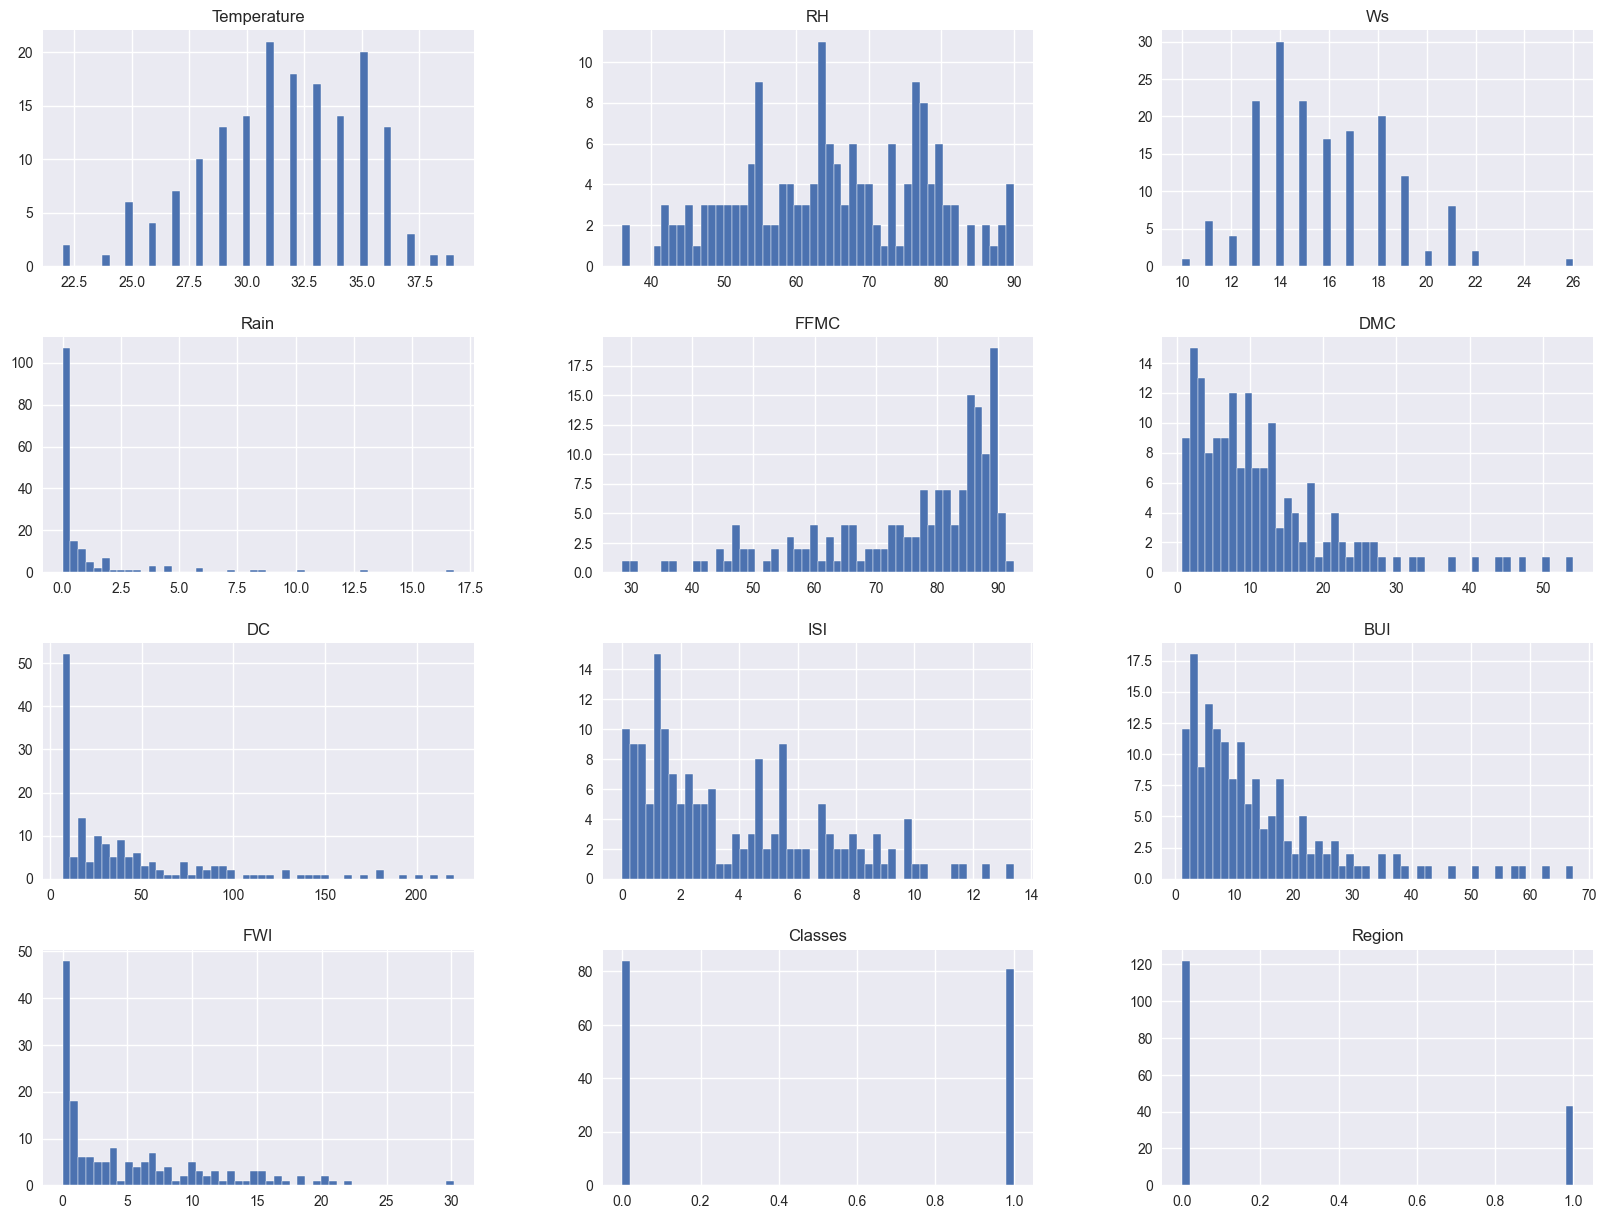

In [331]:
plt.style.use('seaborn-v0_8')
df.hist(bins=50,figsize=(20,15))
plt.show()

In [332]:
# percentage for pie chart

percentage = df['Classes'].value_counts(normalize=True)*100

Text(0.5, 1.0, 'Pie chart  of fire and not fire')

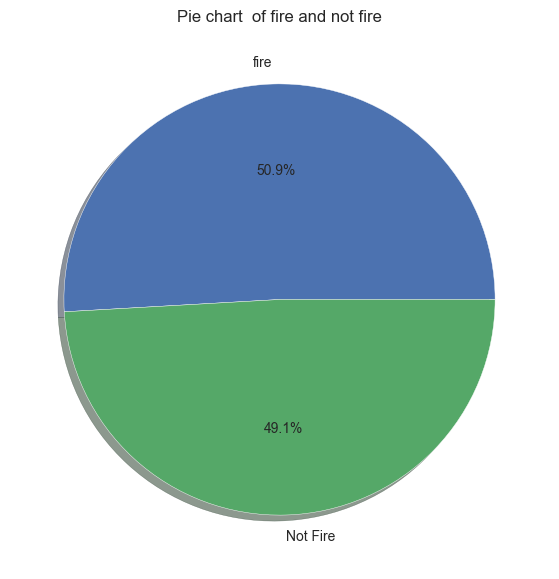

In [333]:
class_labels = ["fire","Not Fire"]
plt.figure(figsize=(12,7))
plt.pie(percentage,labels=class_labels,autopct='%1.1f%%',shadow=True)
plt.title("Pie chart  of fire and not fire")

In [334]:
##corelation

In [335]:
df.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.647108,-0.258418,-0.371205,0.710675,0.482010,0.396031,0.576219,0.456368,0.530100,0.519515,0.194371
RH,-0.647108,1.000000,0.204795,0.218810,-0.642884,-0.301054,-0.133699,-0.546633,-0.243373,-0.411563,-0.402478,-0.387586
Ws,-0.258418,0.204795,1.000000,0.245775,-0.148300,0.070300,0.134897,0.038619,0.095901,0.081775,-0.069129,-0.136723
Rain,-0.371205,0.218810,0.245775,1.000000,-0.536236,-0.284567,-0.291952,-0.378220,-0.288397,-0.322763,-0.345123,0.071792
FFMC,0.710675,-0.642884,-0.148300,-0.536236,1.000000,0.609352,0.505477,0.783568,0.578753,0.679473,0.752532,0.074177
DMC,0.482010,-0.301054,0.070300,-0.284567,0.609352,1.000000,0.926783,0.724683,0.990323,0.893808,0.605207,-0.098059
DC,0.396031,-0.133699,0.134897,-0.291952,0.505477,0.926783,1.000000,0.609455,0.968613,0.813654,0.519963,-0.313917
ISI,0.576219,-0.546633,0.038619,-0.378220,0.783568,0.724683,0.609455,1.000000,0.692245,0.935117,0.817356,0.044732
BUI,0.456368,-0.243373,0.095901,-0.288397,0.578753,0.990323,0.968613,0.692245,1.000000,0.879264,0.581453,-0.182242
FWI,0.530100,-0.411563,0.081775,-0.322763,0.679473,0.893808,0.813654,0.935117,0.879264,1.000000,0.753279,-0.074021


<Axes: >

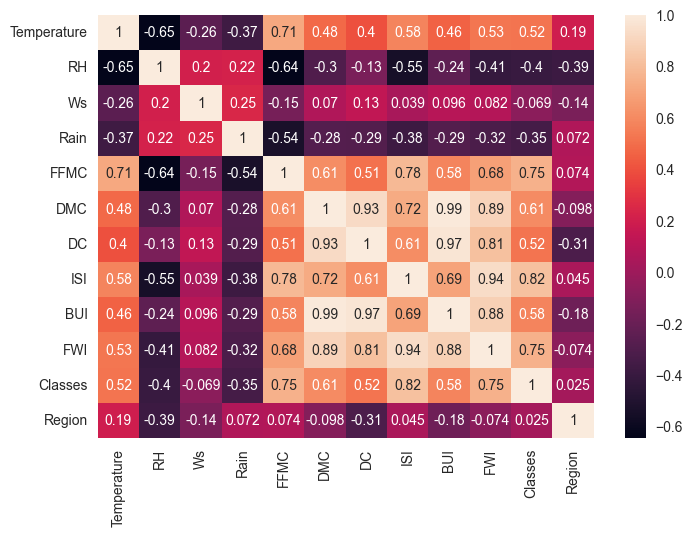

In [336]:
sns.heatmap(df.corr(),annot=True)

<Axes: ylabel='FWI'>

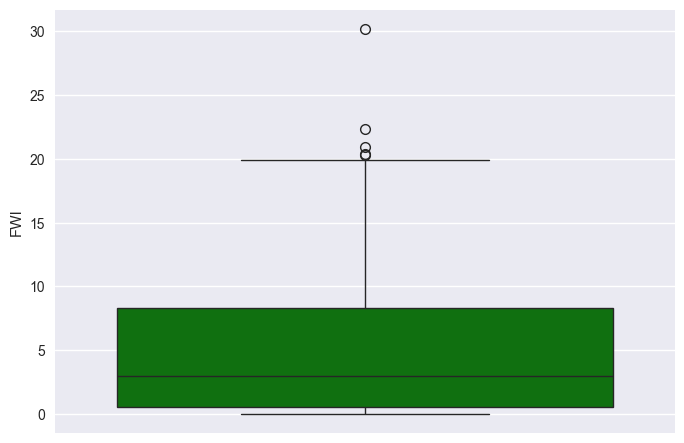

In [337]:
## boxplot
sns.boxplot(df["FWI"],color='g')

In [340]:
df_1['Classes']=np.where(df_1['Classes'].str.contains('not fire'),'not fire','fire') 

Text(0.5, 1.0, 'monthly fire analysis')

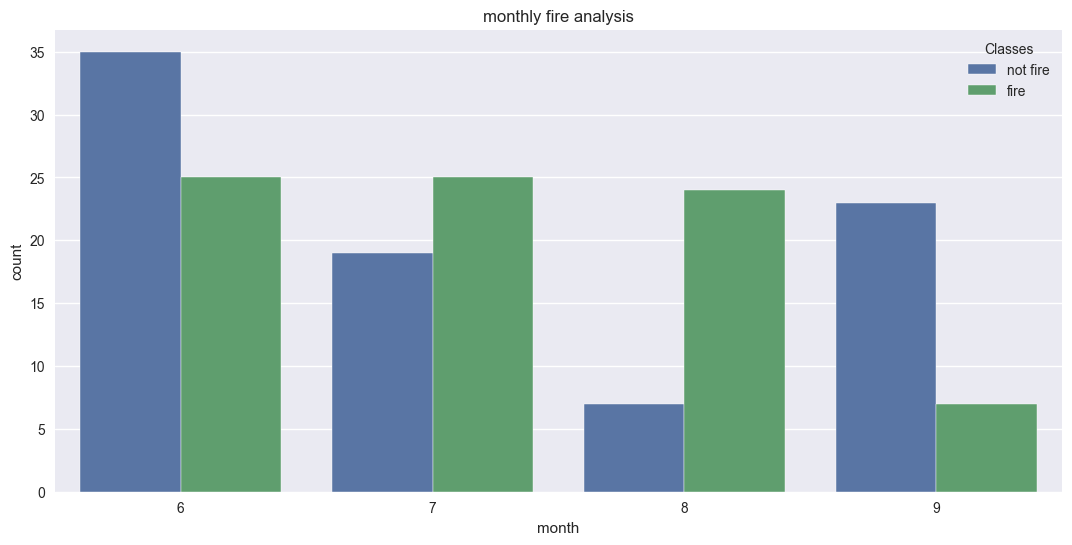

In [342]:
## monthly fire analysis
dftemp = df.loc[df['Region']==1]
plt.subplots(figsize=(13,6))
sns.set_style("darkgrid")
sns.countplot(x='month',hue='Classes',data=df_1)
plt.xlabel("month")
plt.ylabel("count")
plt.title("monthly fire analysis")


In [ ]:
## model  